Цель: разработать и обучить нейронную сеть на TensorFlow для решения задачи классификации рукописных цифр. Набор данных: MNIST, источник: `from keras.datasets`, `import mnist`

В нейронной сети должно быть 3 Dense-слоя: два скрытых слоя, состоящих из 128 нейронов каждый, и выходной слой. Активационные функции на скрытых слоях relu, на выходном - softmax.

В качестве ответа необходимо укажем количество оптимизируемых параметров (Trainable params) в виде целого числа.



##Импорт библиотек

In [3]:
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, concatenate, Activation, Dropout, Conv1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers import Activation

In [7]:
import matplotlib.pyplot as plt

## Загрузка данных

In [8]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Посмотрим на содержание датасета

In [10]:
def plot_MNIST_samples(image_data, label_data, classes,  N=8):

  # определяем кол-во классов
  num_classes = len(classes)
  # определяем сетку для будующих изображений, размером num_classes*N
  plt.figure(figsize=(num_classes,N))

  # для каждого класса
  for i, y in enumerate(classes):

      # определяем соответствующие ему индексы
      idxs = np.flatnonzero(label_data == y)

      # из них случайно выбираем N
      idxs = np.random.choice(idxs, N, replace=False)

      # проходим по каждому индексу и рисуем соответствующие изображения
      for i, idx in enumerate(idxs):
          plt_idx = i * num_classes + y + 1
          plt.subplot(N, num_classes, plt_idx)
          plt.imshow(image_data[idx], cmap='gray')
          plt.axis('off')
          if i == 0:
              plt.title(str(y))
  plt.show()


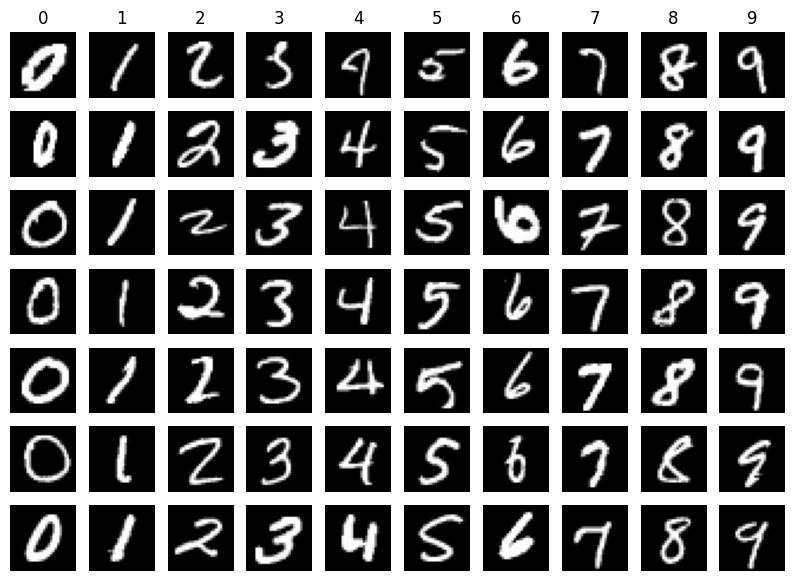

In [11]:
# Создадим лист с именами классов - цифрами от 0 до 9
classes = list(range(0,10))

# Выведем 7 наборов цифр
plot_MNIST_samples(X_train, y_train, classes, N=7)

### Подготовка данных

каждый пиксель - это целое число от  0  до  255 (поэтому поделим на 255)

In [12]:
X_train = X_train / 255
X_test = X_test / 255

Перевод целевой переменной в one-hot формат

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

После one-hot encoding истинным значением целевой переменной будет вектор длины  10 , состоящий из  0  с одной  1  на месте номера класса, к которому принадлежит картинка.

In [14]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

посмотрим на то, в каком виде у нас хранятся входные признаки

In [15]:
input_size = X_train[0].shape
input_size

(28, 28)

In [16]:
X_train.shape

(60000, 28, 28)

### Создание модели для обучения

In [17]:
# Создаем пустую модель
model = Sequential()

сначала растягиваем картинку в длинный вектор слоем Flatten. Получается, что одной картинке соответствует 28*28=784 признака.

In [18]:
# Этот слой вытягивает двумерную картинку в вектор
model.add(Flatten(input_shape=input_size))

# Добавляем скрытый полносвязный слой из 128 нейронов
model.add(Dense(units=128, input_shape=input_size))
# И активацию для скрытого слоя нейронов
model.add(Activation('relu'))

# Добавляем скрытый полносвязный слой из 128 нейронов
model.add(Dense(units=128, input_shape=input_size))

# И активацию для скрытого слоя нейронов
model.add(Activation('relu'))

# Добавляем выходной полносвязный слой из 10 нейронов
model.add(Dense(units=10))

# Чтобы получить на выходе вероятности для каждого класса, выбираем активацию
# softmax
model.add(Activation('softmax'))

In [19]:
# Компилируем модель
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Обучение нейронной сети

In [20]:
model.fit(X_train, y_train, epochs=5, batch_size=40)

Epoch 1/5
1500/1500 [==============================] - 7s 3ms/step - loss: 0.2366 - accuracy: 0.9293
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0979 - accuracy: 0.9698
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0686 - accuracy: 0.9785
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0521 - accuracy: 0.9834
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0411 - accuracy: 0.9874


смотрим сколько слоев в модели, сколько параметров у каждого слоя

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 activation_2 (Activation)   (None, 10)                0

Ответ: Trainable params: 118, 282